In [2]:
import pandas as pd

# Đọc file CSV
user_data = pd.read_csv(r"G:\pjmxh\user_data_cleaned.csv")
print(user_data.head())

C:\Users\sourcePJ\AppData\Local\Temp\ipykernel_912\1377846241.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(r"G:\pjmxh\user_data_cleaned.csv")


  problem_id_x  user_id  type location exercise_id  avg_score_user  \
0   Pm_6906522  U_10000     1      7.4  Ex_7007033             1.0   
1   Pm_6906522  U_10000     1      7.4  Ex_7007033             1.0   
2   Pm_6906522  U_10000     1      7.4  Ex_7007033             1.0   
3   Pm_6906522  U_10000     1      7.4  Ex_7007033             1.0   
4   Pm_6906522  U_10000     2      7.4  Ex_7007033             2.0   

   avg_score_problem  avg_score_exercise  
0               2.35            1.992424  
1               2.35            1.992424  
2               2.35            1.992424  
3               2.35            1.992424  
4               2.35            1.992424  


In [4]:
# Loại bỏ các cột không cần thiết
columns_to_drop = ['problem_id_x', 'type', 'location', 'avg_score_user', 'avg_score_problem']
user_data = user_data.drop(columns=columns_to_drop)

# Hiển thị kết quả
print(user_data)

             user_id exercise_id  avg_score_exercise
0            U_10000  Ex_7007033            1.992424
1            U_10000  Ex_7007033            1.992424
2            U_10000  Ex_7007033            1.992424
3            U_10000  Ex_7007033            1.992424
4            U_10000  Ex_7007033            1.992424
...              ...         ...                 ...
91665432  U_12455261  Ex_1255232            1.411403
91665433  U_12455261  Ex_1255232            1.411403
91665434  U_12455261  Ex_1255232            1.411403
91665435  U_12455261  Ex_1255232            1.411403
91665436  U_12455261  Ex_1255232            1.411403

[91665437 rows x 3 columns]


In [6]:
import pandas as pd

# Giả sử user_data là DataFrame của bạn
user_data = user_data.drop_duplicates()

# In kết quả
print(user_data)

             user_id exercise_id  avg_score_exercise
0            U_10000  Ex_7007033            1.992424
56         U_1000038  Ex_6249697            1.844455
81         U_1000290  Ex_6280714            1.950000
130        U_1000290  Ex_6280718            1.965714
251        U_1000290  Ex_6280721            1.985185
...              ...         ...                 ...
91662651  U_12455261  Ex_1255051            1.538114
91663435  U_12455261  Ex_1255089            1.282782
91664459  U_12455261  Ex_1255150            1.503012
91664500  U_12455261  Ex_1255210            1.340535
91664861  U_12455261  Ex_1255232            1.411403

[1338421 rows x 3 columns]


In [8]:
import pandas as pd
# Loại bỏ chữ "U_" khỏi `user_id`
user_data['user_id'] = user_data['user_id'].str.replace("U_", "", regex=False)

# Kiểm tra kết quả
print(user_data)

           user_id exercise_id  avg_score_exercise
0            10000  Ex_7007033            1.992424
56         1000038  Ex_6249697            1.844455
81         1000290  Ex_6280714            1.950000
130        1000290  Ex_6280718            1.965714
251        1000290  Ex_6280721            1.985185
...            ...         ...                 ...
91662651  12455261  Ex_1255051            1.538114
91663435  12455261  Ex_1255089            1.282782
91664459  12455261  Ex_1255150            1.503012
91664500  12455261  Ex_1255210            1.340535
91664861  12455261  Ex_1255232            1.411403

[1338421 rows x 3 columns]


In [10]:
import pandas as pd

# Đọc file CSV
course_data = pd.read_csv(r"G:\pjmxh\Label2s\course_students.csv")

# Chuyển đổi `Student_IDs` thành danh sách
course_data['Student_IDs'] = course_data['Student_IDs'].apply(
    lambda x: [s.strip() for s in str(x).split(',')] if pd.notnull(x) else []
)

# Kiểm tra kết quả
print(course_data.head())

   Course_ID                                        Student_IDs
0     682129  [22, 24, 10362, 11731, 12054, 12669, 24277, 24...
1    2294668  [22, 11904, 20400, 27983, 34828, 35688, 41212,...
2     597214  [24, 94015, 361418, 570547, 1070216, 1705400, ...
3     605512  [24, 112772, 361418, 1325611, 2005701, 3102458...
4     597211  [24, 361418, 386441, 570547, 1070216, 1705400,...


In [12]:
import pandas as pd

# Giả sử `course_data` và `user_data` đã được load vào
# Chuyển đổi Student_IDs thành từng hàng riêng lẻ
expanded_course_data = course_data.explode('Student_IDs')
expanded_course_data['Student_IDs'] = expanded_course_data['Student_IDs'].astype(int)

# Đổi tên cột để chuẩn bị ánh xạ
mapping = expanded_course_data.rename(columns={'Student_IDs': 'user_id'})

# Merge `user_data` với mapping
user_data['user_id'] = user_data['user_id'].astype(int)
merged_data = user_data.merge(mapping, on='user_id', how='left')

# Kết quả
print(merged_data)

          user_id exercise_id  avg_score_exercise  Course_ID
0           10000  Ex_7007033            1.992424     680963
1           10000  Ex_7007033            1.992424    2033958
2         1000038  Ex_6249697            1.844455     694149
3         1000290  Ex_6280714            1.950000     697293
4         1000290  Ex_6280718            1.965714     697293
...           ...         ...                 ...        ...
4052959  12455261  Ex_1255150            1.503012     749807
4052960  12455261  Ex_1255210            1.340535     707456
4052961  12455261  Ex_1255210            1.340535     749807
4052962  12455261  Ex_1255232            1.411403     707456
4052963  12455261  Ex_1255232            1.411403     749807

[4052964 rows x 4 columns]


In [14]:
import pandas as pd

# Giả sử merged_data là dataframe hiện tại của bạn

# Tính trung bình `avg_score_exercise` theo `Course_ID`
merged_data['avg_score_course'] = merged_data.groupby('Course_ID')['avg_score_exercise'].transform('mean')

# In kết quả của merged_data
print(merged_data)


          user_id exercise_id  avg_score_exercise  Course_ID  avg_score_course
0           10000  Ex_7007033            1.992424     680963          2.161166
1           10000  Ex_7007033            1.992424    2033958          2.058446
2         1000038  Ex_6249697            1.844455     694149          2.168276
3         1000290  Ex_6280714            1.950000     697293          2.144274
4         1000290  Ex_6280718            1.965714     697293          2.144274
...           ...         ...                 ...        ...               ...
4052959  12455261  Ex_1255150            1.503012     749807          1.678172
4052960  12455261  Ex_1255210            1.340535     707456          1.612842
4052961  12455261  Ex_1255210            1.340535     749807          1.678172
4052962  12455261  Ex_1255232            1.411403     707456          1.612842
4052963  12455261  Ex_1255232            1.411403     749807          1.678172

[4052964 rows x 5 columns]


In [16]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


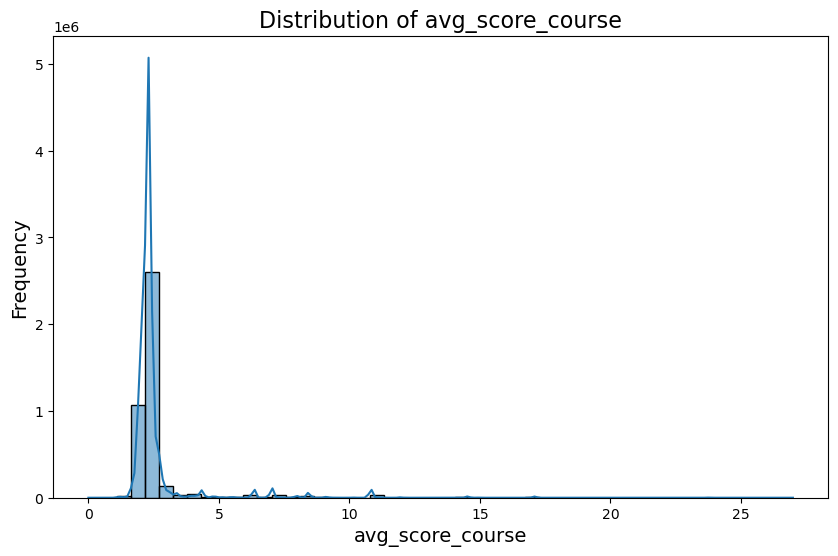

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử merged_data đã có cột avg_score_course

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['avg_score_course'], kde=True, bins=50)

# Thêm tiêu đề và nhãn cho trục
plt.title('Distribution of avg_score_course', fontsize=16)
plt.xlabel('avg_score_course', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Hiển thị biểu đồ
plt.show()


In [20]:
# Lưu DataFrame user_problems thành file CSV
merged_data.to_csv(r"G:\pjmxh\user_data.csv", index=False)

# Hiển thị thông báo thành công
print("Dữ liệu đã được lưu thành công vào file CSV.")

Dữ liệu đã được lưu thành công vào file CSV.
